In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv("hotel_booking.csv")
pd.set_option('display.max_columns', None)
display(df.head(2))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157


In [3]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# To do list
- Data cleaning and data processing
- Removing outliers

## Quesions
1. Which hotel has the highest cancel rate of booking?
2. Which country has the most cancel rate of booking?
3. What is the rate of previous booking that were canceled by the prior customer?
4. Which months has the highest booking cancel count and which month has the lowest?
5. Is the cancelation rate by year is Increasing?
6. Find top 10 country where the booking cancel rate is high?
7. Find top 10 country where ADR is high? Is these countries have more cancel rate compaired to the other country?
8. Adr trand for both hotel (Time period (2015-2017))

### Cleaning

In [6]:
df.drop(columns = ['company'],inplace = True)

In [7]:
df.dropna(subset = {'country'},inplace = True)

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [9]:
df.reservation_status_date = pd.to_datetime(df.reservation_status_date)

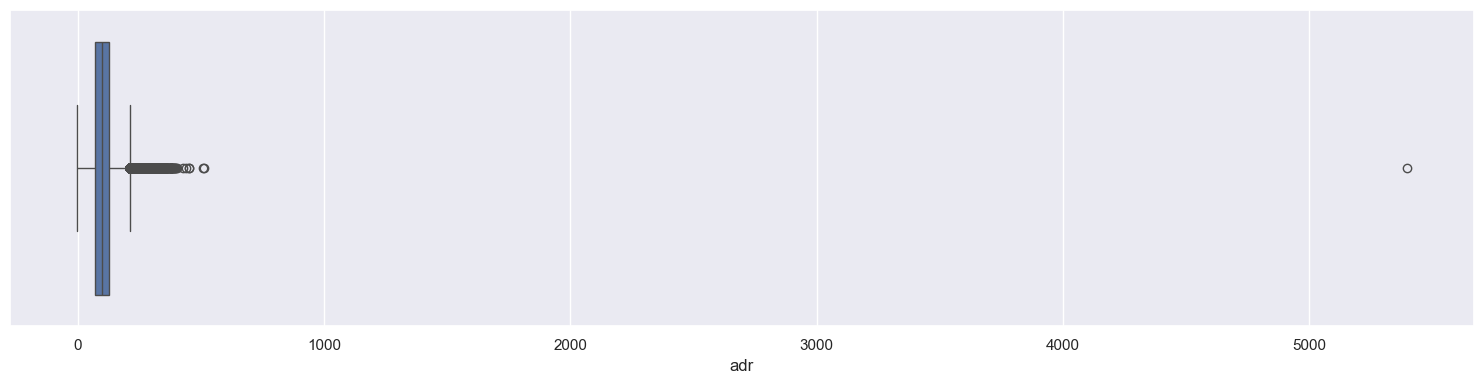

In [10]:
plt.figure(figsize=(15,4))
sns.set(style = "darkgrid")
sns.boxplot(x = df.adr)
plt.tight_layout()
plt.show()

### Outlier removing

In [11]:
df['adr'] = df['adr'].where(df['adr']<5000,df["adr"].quantile(0.99))

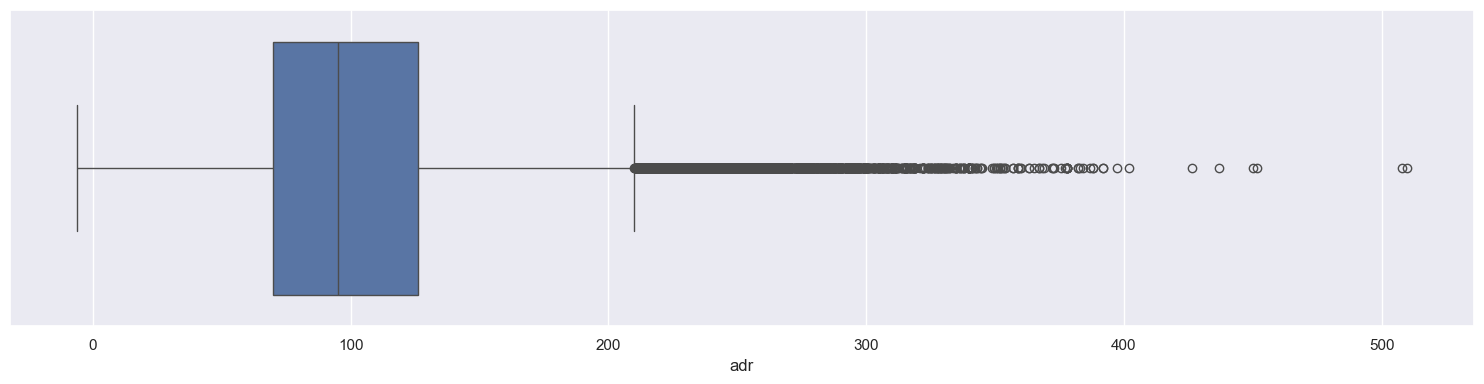

In [12]:
plt.figure(figsize=(15,4))
sns.set(style = "darkgrid")
sns.boxplot(x = df.adr)
plt.tight_layout()
plt.show()

In [13]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157


## Which hotel has the highest cancel rate of booking?

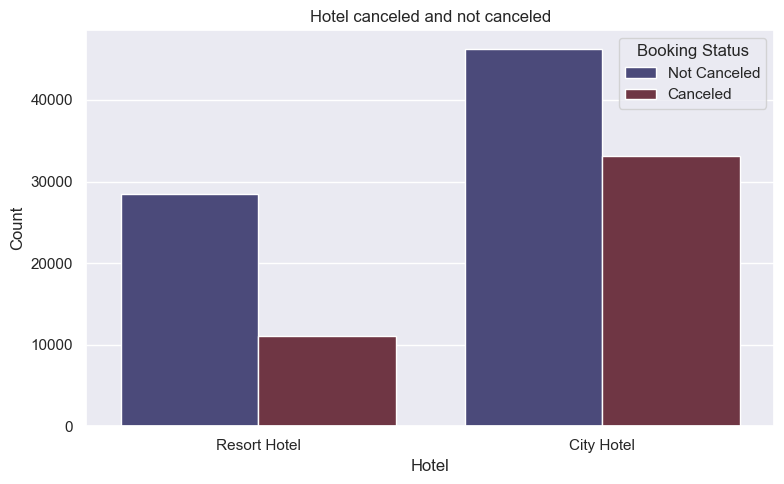

In [14]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = df['hotel'],hue = df['is_canceled'],palette='icefire')
plt.title("Hotel canceled and not canceled")
plt.xlabel("Hotel")
plt.ylabel("Count")

handles, _ = ax.get_legend_handles_labels()  # Get color handles
ax.legend(handles, ['Not Canceled', 'Canceled'], title='Booking Status')

plt.tight_layout()
plt.show()

## Which country has the most cancel rate of booking?

In [15]:
top_10 = df[df['is_canceled'] == 1].groupby("country").size().sort_values(ascending = False).head(10).index
cancel_country = df[df['country'].isin(top_10)].groupby('country')['is_canceled'].value_counts().sort_values(ascending = False).reset_index()
cancel_country.head(1)

,country,is_canceled,count
0,PRT,1,27519


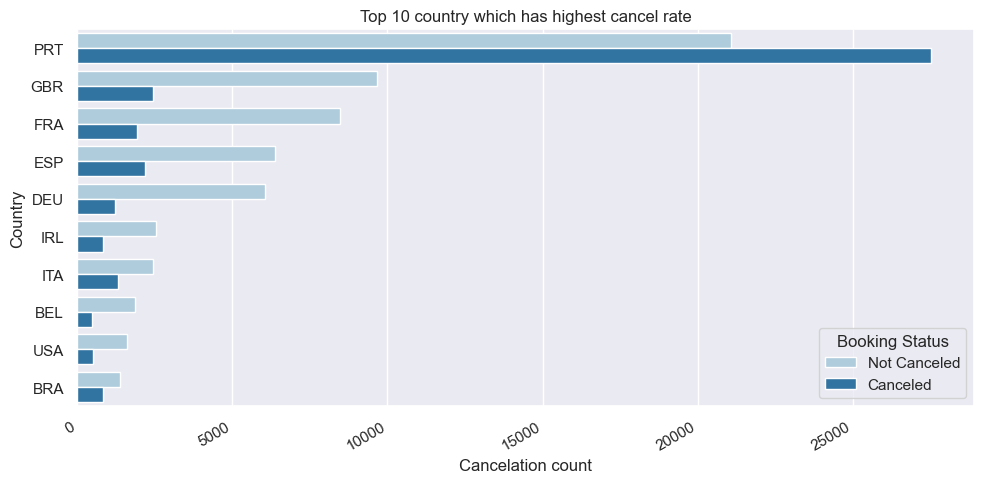

In [16]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(y = cancel_country['country'],
            x= cancel_country['count'],
            hue = cancel_country['is_canceled'],
            palette='Paired')

plt.title("Top 10 country which has highest cancel rate")
plt.xlabel("Cancelation count")
plt.ylabel("Country")

handles, _ = ax.get_legend_handles_labels()  # Get color handles
ax.legend(handles, ['Not Canceled', 'Canceled'], title='Booking Status')

plt.gcf().autofmt_xdate()
plt.tight_layout()

plt.show()

## What is the rate of previous booking that were canceled by the prior customer?

In [17]:
total = df.groupby("hotel").size().reset_index(name = "total")
prior = df[df['previous_cancellations']>0].groupby(["hotel"]).size().reset_index(name ="canceled")
res = pd.merge(total,prior,on = "hotel")
res["Per"] =  ((res.canceled/res.total)*100).round(2)
res

,hotel,total,canceled,Per
0,City Hotel,79306,5389,6.80
1,Resort Hotel,39596,1058,2.67


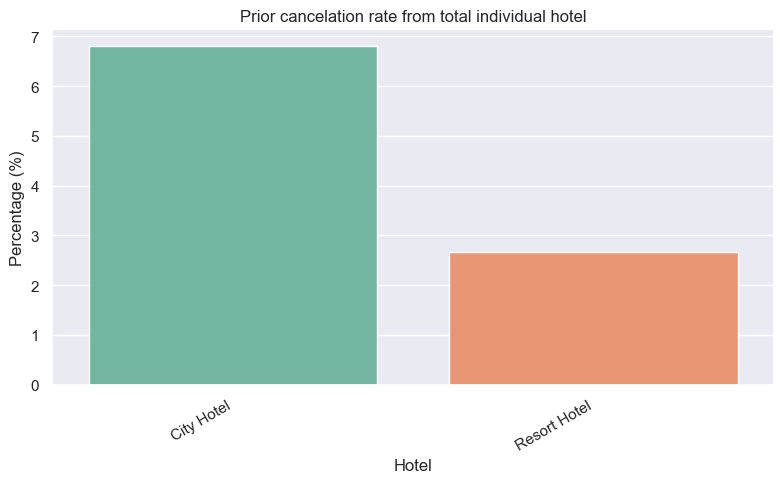

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(data = res,x = "hotel",y= "Per",palette="Set2")
plt.title("Prior cancelation rate from total individual hotel")
plt.ylabel("Percentage")

plt.xlabel("Hotel")
plt.ylabel("Percentage (%)")

plt.gcf().autofmt_xdate()
plt.tight_layout()

plt.show()

## Which months has the highest booking cancel count and which month has the lowest?

In [19]:
mont = df[df["is_canceled"] == 1].groupby('hotel')[["arrival_date_month"]].value_counts().reset_index()
mont.head(2)

,hotel,arrival_date_month,count
0,City Hotel,May,3653
1,City Hotel,August,3602


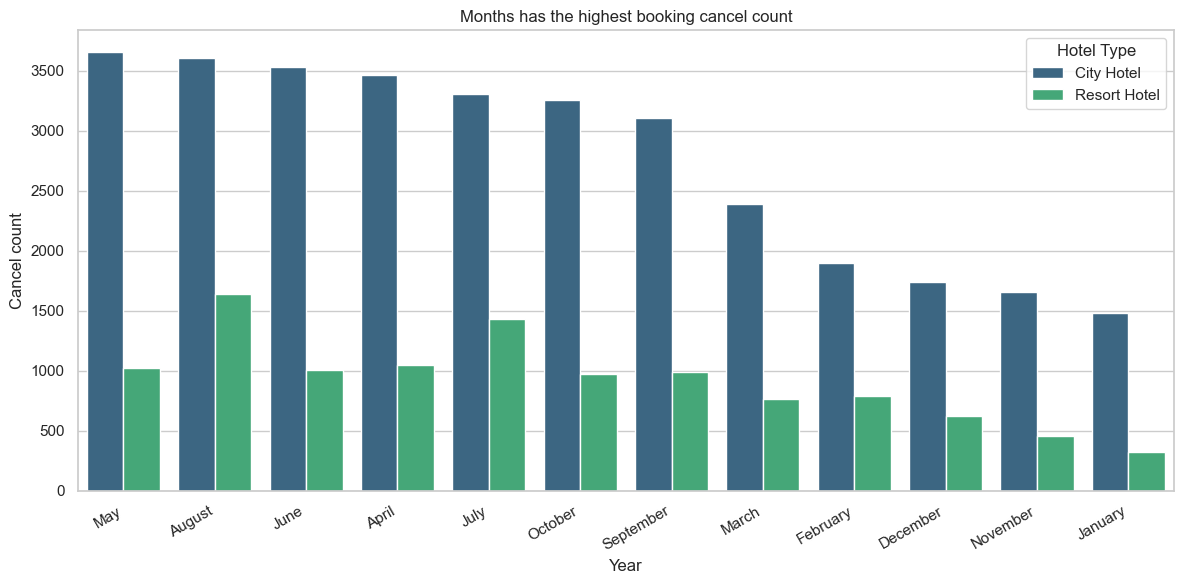

In [20]:
sns.set(style = "whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(data = mont,x = "arrival_date_month",y = "count",hue = 'hotel',palette="viridis")

plt.title("Months has the highest booking cancel count")
plt.xlabel("Year")
plt.ylabel("Cancel count")

plt.legend(title='Hotel Type')
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

## Is the cancelation rate by year is Increasing?

In [21]:
cancel_year = df[df["is_canceled"] == 1].groupby(['hotel'])['arrival_date_year'].value_counts().reset_index()
cancel_year.head(2)

,hotel,arrival_date_year,count
0,City Hotel,2016,15403
1,City Hotel,2017,11687


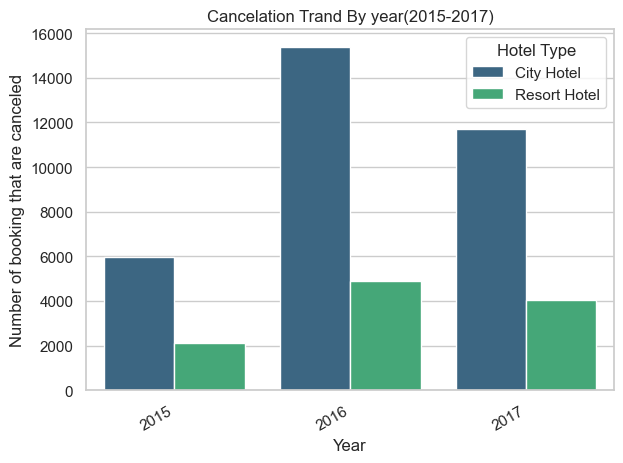

In [22]:
sns.barplot(x = "arrival_date_year",y = "count",data = cancel_year,hue = 'hotel',palette='viridis')

plt.title("Cancelation Trand By year(2015-2017)")
plt.xlabel("Year")
plt.ylabel("Number of booking that are canceled")

plt.legend(title='Hotel Type')
plt.gcf().autofmt_xdate()
plt.tight_layout()

plt.show()

## Find top 10 country where the booking cancel rate is high?

In [23]:
se = df[df["is_canceled"] == 1].groupby(["country"])["is_canceled"].size().sort_values(ascending = False).head(10)
se.head(2)

country
PRT    27519
GBR     2453
Name: is_canceled, dtype: int64

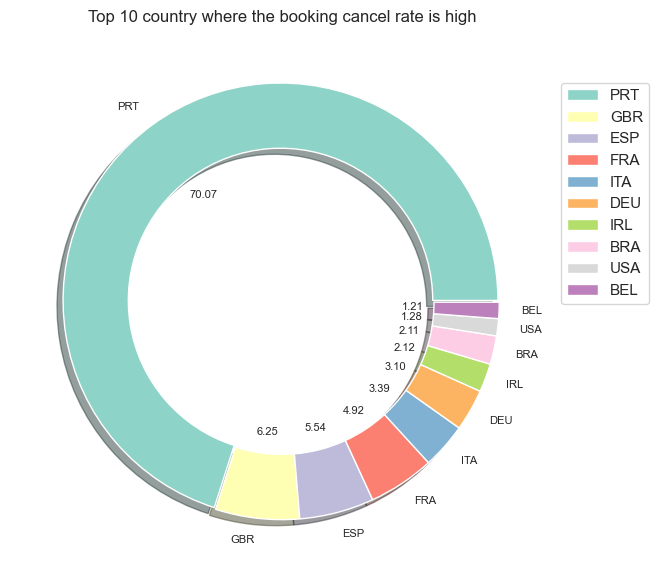

In [24]:
sns.set_palette("Set3")
plt.figure(figsize=(10,6))
plt.pie(se,labels = se.index,
        autopct='%.2f',
        shadow=True,
        explode =[0.01,0,0,0,0,0,0,0,0,0],
        wedgeprops={'edgecolor': 'white','width': 0.3},
        textprops={'fontsize': 8})

plt.legend(bbox_to_anchor=(1, 0.7), loc='center left') 
plt.title("Top 10 country where the booking cancel rate is high")

plt.gcf().autofmt_xdate()
plt.tight_layout()

plt.show()

## Find top 10 country where ADR is high? Is these countries have more cancel rate compaired to the other country?

In [25]:
selected = df.groupby(['country'])['adr'].mean().sort_values(ascending = False).head(10)
selected.head(2)

country
DJI    273.0
AIA    265.0
Name: adr, dtype: float64

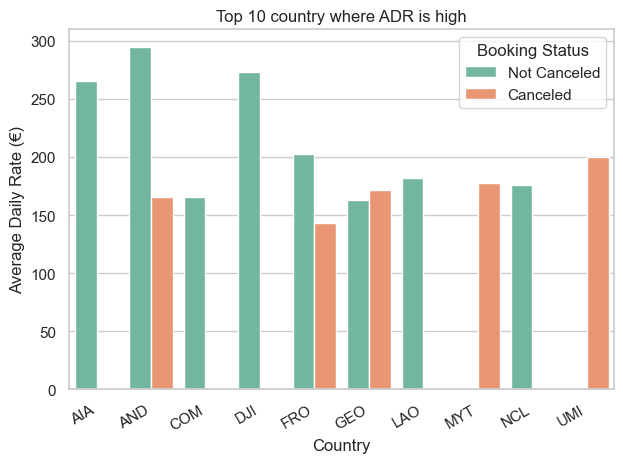

In [26]:
n = df[df['country'].isin(selected.index)].groupby(['country','is_canceled'])['adr'].mean().reset_index(name = 'adr')
ax = sns.barplot(x = 'country',
                 y = 'adr',
                 data = n,
                 hue = 'is_canceled',
                 palette='Set2')

handles, _ = ax.get_legend_handles_labels()  # Get color handles
ax.legend(handles, ['Not Canceled', 'Canceled'], title='Booking Status')

plt.title("Top 10 country where ADR is high")
plt.xlabel("Country")
plt.ylabel("Average Daily Rate (€)")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

## ADR trand for both hotel (Time period (2015-2017))

In [27]:
d = df[(df['reservation_status_date'].dt.year >= 2016) & (df['reservation_status_date'].dt.year <= 2017)]
sc =d.groupby([d['reservation_status_date'],'hotel'])['adr'].mean().reset_index()
sc.head(2)

,reservation_status_date,hotel,adr
0,2016-01-01,City Hotel,88.789012
1,2016-01-01,Resort Hotel,125.437647


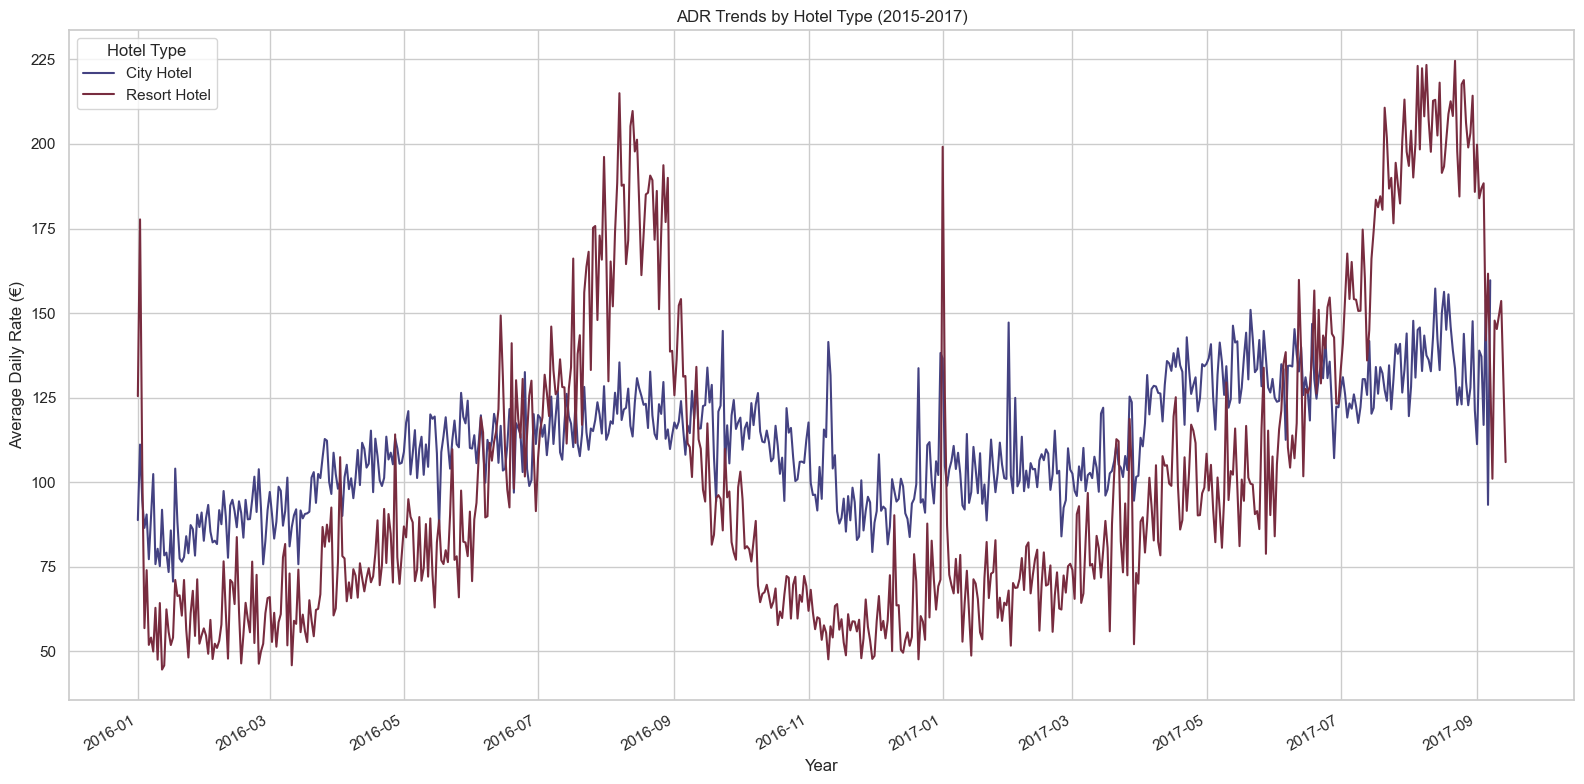

In [28]:
plt.figure(figsize=(16,8))
sns.lineplot(x = 'reservation_status_date',y = 'adr',data = sc,hue = 'hotel',palette='icefire')

plt.title("ADR Trends by Hotel Type (2015-2017)")
plt.xlabel("Year")
plt.ylabel("Average Daily Rate (€)")

plt.legend(title='Hotel Type')
plt.gcf().autofmt_xdate()
plt.tight_layout()

plt.show()